In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import keras
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score, auc
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras.datasets import imdb
import os
import time

In [ ]:
(X_train, y_train), (X_test, y_test)= imdb.load_data()

In [ ]:
X=np.concatenate((X_train, X_test), axis=0)
y=np.concatenate((y_train, y_test), axis=0)

In [ ]:
X.shape

(50000,)

In [ ]:
y.shape

(50000,)

In [ ]:
np.unique(y)

array([0, 1])

REVIEW


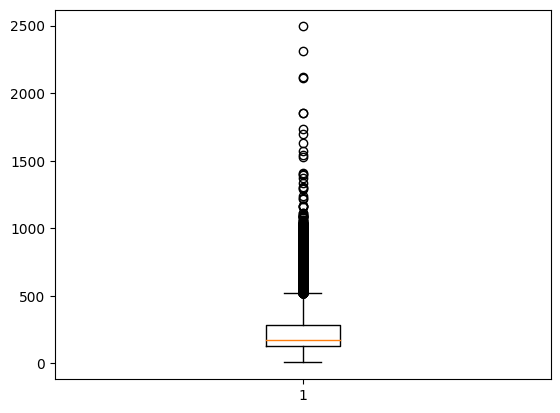

In [ ]:
print("REVIEW")
result=[len(x) for x in X]
plt.boxplot(result)
plt.show()

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1
  return results

In [ ]:
X_train=vectorize_sequences(train_data)
X_test=vectorize_sequences(test_data)

In [ ]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [ ]:
model=Sequential()
model.add(Dense(32, activation = 'relu', input_dim=10000))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                320032    
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321,121
Trainable params: 321,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_val=X_train[:10000]
partial_X_train=X_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [ ]:
start_time=time.time()
history=model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))
total_time=time.time()-start_time

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.5260 - accuracy: 0.7778 - val_loss: 0.3761 - val_accuracy: 0.8545
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2674 - accuracy: 0.9080 - val_loss: 0.2811 - val_accuracy: 0.8884
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1743 - accuracy: 0.9417 - val_loss: 0.2776 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1227 - accuracy: 0.9615 - val_loss: 0.2992 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0859 - accuracy: 0.9771 - val_loss: 0.3298 - val_accuracy: 0.8789
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0592 - accuracy: 0.9867 - val_loss: 0.3653 - val_accuracy: 0.8796
Epoch 7/20
30/30 [==============================] - 2s 63ms/step - loss: 0.0395 - accuracy: 0.9937 - val_loss: 0.4098 - val_accuracy: 0.8772
Epoch 8/20
30

In [ ]:
print("The Dense Convolutional Neural Network 1 layer tool %.4f seconds to train." %(total_time))

The Dense Convolutional Neural Network 1 layer tool 42.9139 seconds to train.


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

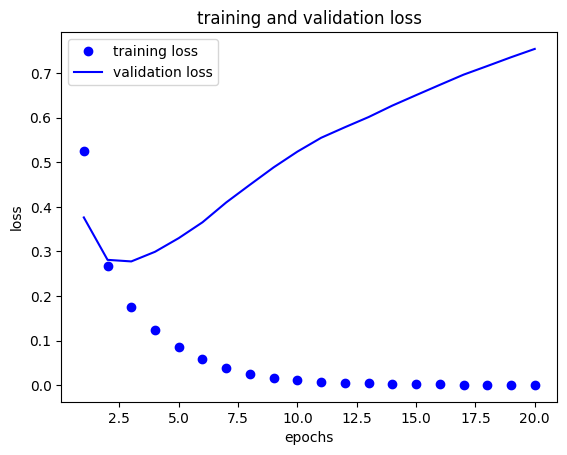

In [ ]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='training loss')
plt.plot(epochs, val_loss_values, 'b', label='validation loss')
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

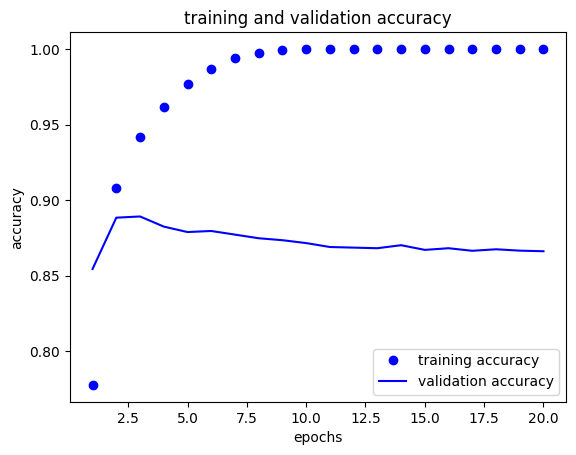

In [ ]:
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='validation accuracy')
plt.title("training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
result=model.evaluate(X_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.8117 - accuracy: 0.8568


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, auc
#predictions
pred = model.predict(x_test)
classes_x=np.argmax(pred,axis=1)

#accuracy
accuracy_score(y_test,classes_x)

782/782 [==============================] - 3s 4ms/step


0.5

[[12500     0]
 [12500     0]]


Text(0.5, 23.52222222222222, 'Predicted label')

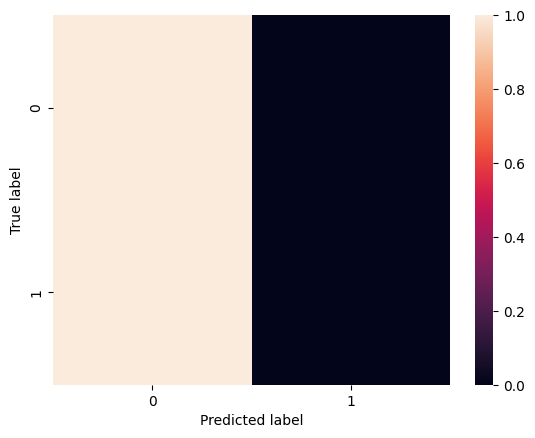

In [ ]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, classes_x)
print(conf_mat)

conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#Dense with Two Layer
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
start_time_m2 = time.time()
history= model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
total_time_m2 = time.time() - start_time_m2

print("The Dense Convolutional Neural Network 2 layers took %.4f seconds to train." % (total_time_m2))

Epoch 1/20
30/30 [==============================] - 5s 107ms/step - loss: 0.5444 - acc: 0.7591 - val_loss: 0.3528 - val_acc: 0.8618
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2685 - acc: 0.8959 - val_loss: 0.2927 - val_acc: 0.8836
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1923 - acc: 0.9267 - val_loss: 0.3051 - val_acc: 0.8812
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1480 - acc: 0.9475 - val_loss: 0.3280 - val_acc: 0.8750
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1160 - acc: 0.9617 - val_loss: 0.3661 - val_acc: 0.8707
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0901 - acc: 0.9705 - val_loss: 0.4201 - val_acc: 0.8660
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0671 - acc: 0.9816 - val_loss: 0.4703 - val_acc: 0.8642
Epoch 8/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0495 - 

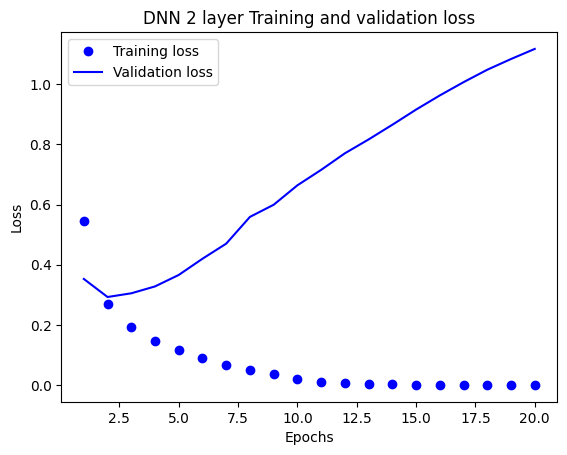

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('DNN 2 layer Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

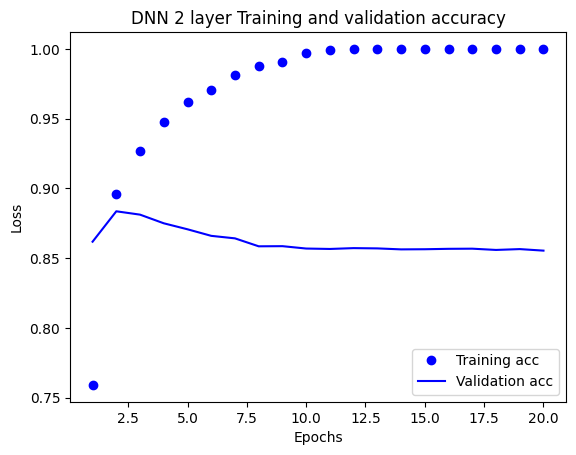

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('DNN 2 layer Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160032    
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 162,177
Trainable params: 162,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from numpy.ma.core import argmax
pred = model2.predict(x_test)
classes_x=argmax(pred,axis=-1)
#accuracy
accuracy_score(y_test,classes_x)

782/782 [==============================] - 3s 4ms/step


0.5